In [475]:
import pandas as pd
import requests
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import json
from pandas.io.json import json_normalize
import openpyxl as px

# **Data set #1**

First, get the data on Auto-MPG on select makes from 1970-1982.

This will be from tab deliminated data, although the spacing is not uniform.

In [476]:
url = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
text = url.text
print (text)

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"
15.0   8   383.0      170.0      3563.      10.0   70  1	"dodge challenger se"
14.0   8   340.0      160.0      3609.       8.0   70  1	"plymouth 'cuda 340"
15.0   8   400.0      150.0      3761.       9.5   70  1	"chevrolet monte ca

Because the data is neither uniformly tab delimited nor comma delimited, I will modify it to read as a .csv file

In [477]:
text=re.sub(r'  +',',',text)
text=re.sub(r'	',',',text)
print(text)

18.0,8,307.0,130.0,3504.,12.0,70,1,"chevrolet chevelle malibu"
15.0,8,350.0,165.0,3693.,11.5,70,1,"buick skylark 320"
18.0,8,318.0,150.0,3436.,11.0,70,1,"plymouth satellite"
16.0,8,304.0,150.0,3433.,12.0,70,1,"amc rebel sst"
17.0,8,302.0,140.0,3449.,10.5,70,1,"ford torino"
15.0,8,429.0,198.0,4341.,10.0,70,1,"ford galaxie 500"
14.0,8,454.0,220.0,4354.,9.0,70,1,"chevrolet impala"
14.0,8,440.0,215.0,4312.,8.5,70,1,"plymouth fury iii"
14.0,8,455.0,225.0,4425.,10.0,70,1,"pontiac catalina"
15.0,8,390.0,190.0,3850.,8.5,70,1,"amc ambassador dpl"
15.0,8,383.0,170.0,3563.,10.0,70,1,"dodge challenger se"
14.0,8,340.0,160.0,3609.,8.0,70,1,"plymouth 'cuda 340"
15.0,8,400.0,150.0,3761.,9.5,70,1,"chevrolet monte carlo"
14.0,8,455.0,225.0,3086.,10.0,70,1,"buick estate wagon (sw)"
24.0,4,113.0,95.00,2372.,15.0,70,3,"toyota corona mark ii"
22.0,6,198.0,95.00,2833.,15.5,70,1,"plymouth duster"
18.0,6,199.0,97.00,2774.,15.5,70,1,"amc hornet"
21.0,6,200.0,85.00,2587.,16.0,70,1,"ford maverick"
27.0,4,97.00,8

Now I will take this information, make a .csv file, name the columns, and create the table.

In [478]:
j = open('text.csv','w')
j.write(text)
j.close()
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv("text.csv", header=None, names=names)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


I noticed some question marks in hosepower, so I will drop those next

In [479]:
data.replace({'?': np.nan}).dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [480]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


I want to see how the variables relate to each other, so I will make a pair grid

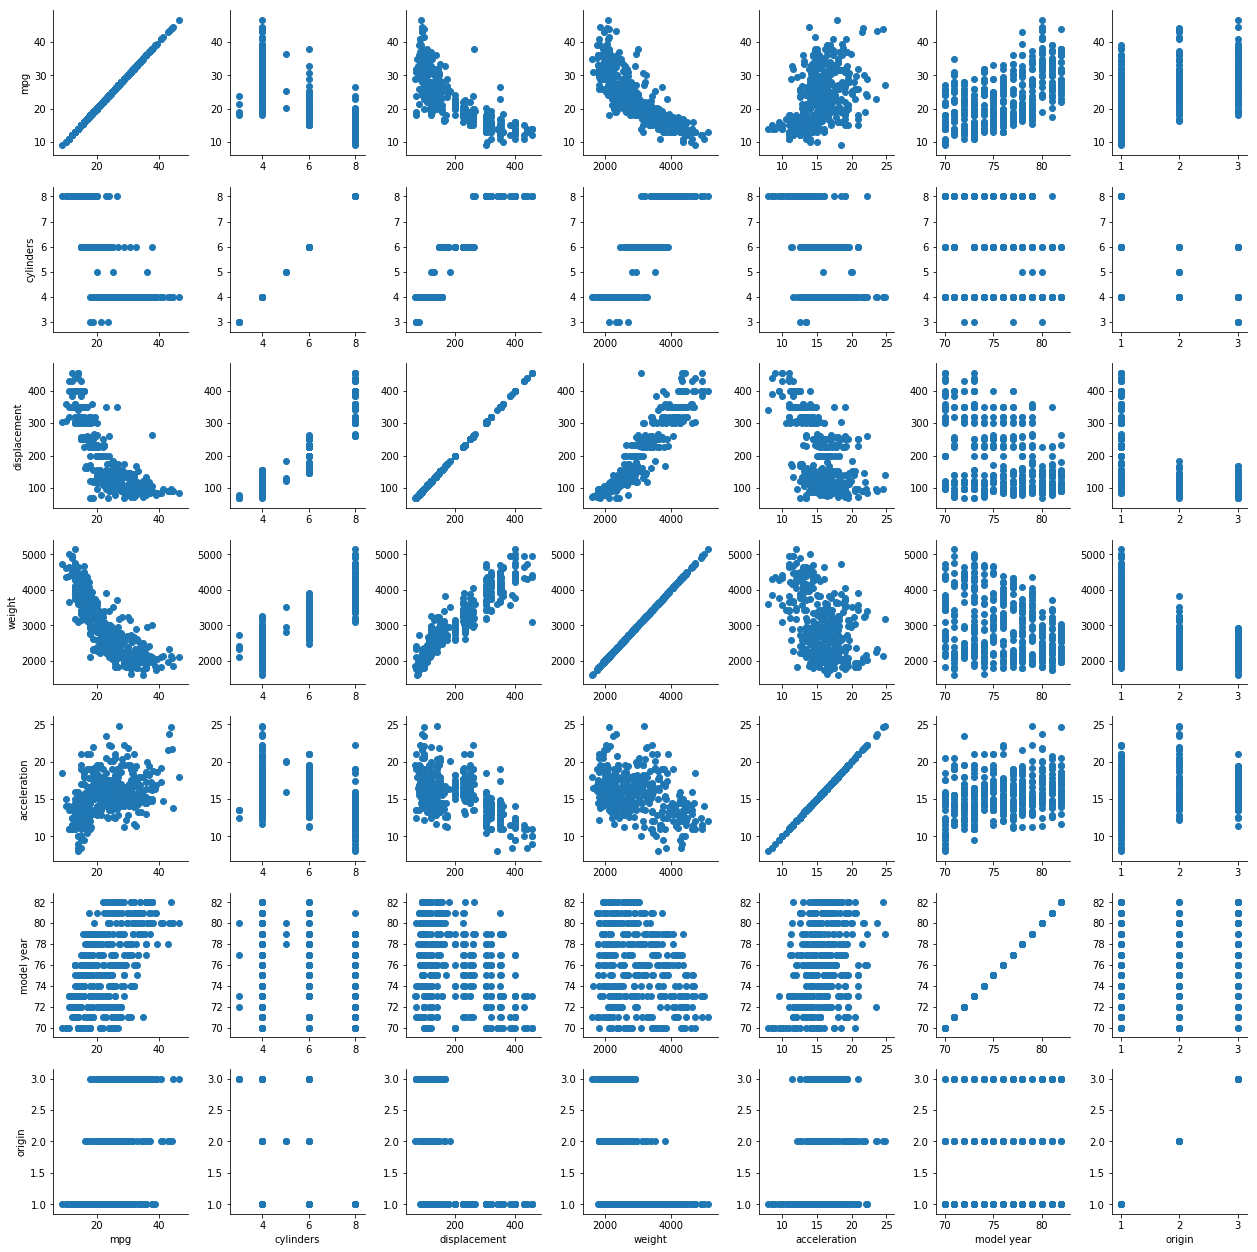

In [481]:
g = sns.PairGrid(data)
g.map(plt.scatter);

# **Data set #2**

Now I will get meteor landing data.

This will be from a json data set.

In [482]:
data2 = requests.get("https://data.nasa.gov/resource/y77d-th95.json")
data2.text

'[{"fall":"Fell","geolocation":{"type":"Point","coordinates":[6.08333,50.775]},"id":"1","mass":"21","name":"Aachen","nametype":"Valid","recclass":"L5","reclat":"50.775000","reclong":"6.083330","year":"1880-01-01T00:00:00.000"}\n,{"fall":"Fell","geolocation":{"type":"Point","coordinates":[10.23333,56.18333]},"id":"2","mass":"720","name":"Aarhus","nametype":"Valid","recclass":"H6","reclat":"56.183330","reclong":"10.233330","year":"1951-01-01T00:00:00.000"}\n,{"fall":"Fell","geolocation":{"type":"Point","coordinates":[-113,54.21667]},"id":"6","mass":"107000","name":"Abee","nametype":"Valid","recclass":"EH4","reclat":"54.216670","reclong":"-113.000000","year":"1952-01-01T00:00:00.000"}\n,{"fall":"Fell","geolocation":{"type":"Point","coordinates":[-99.9,16.88333]},"id":"10","mass":"1914","name":"Acapulco","nametype":"Valid","recclass":"Acapulcoite","reclat":"16.883330","reclong":"-99.900000","year":"1976-01-01T00:00:00.000"}\n,{"fall":"Fell","geolocation":{"type":"Point","coordinates":[-64.

After getting the json I will normalize it for better visualization

In [483]:
json_normalize(data2.json())

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,fall,geolocation.coordinates,geolocation.type,id,mass,name,nametype,recclass,reclat,reclong,year
0,NaN,NaN,Fell,"[6.08333, 50.775]",Point,1,21,Aachen,Valid,L5,50.775000,6.083330,1880-01-01T00:00:00.000
1,NaN,NaN,Fell,"[10.23333, 56.18333]",Point,2,720,Aarhus,Valid,H6,56.183330,10.233330,1951-01-01T00:00:00.000
2,NaN,NaN,Fell,"[-113, 54.21667]",Point,6,107000,Abee,Valid,EH4,54.216670,-113.000000,1952-01-01T00:00:00.000
3,NaN,NaN,Fell,"[-99.9, 16.88333]",Point,10,1914,Acapulco,Valid,Acapulcoite,16.883330,-99.900000,1976-01-01T00:00:00.000
4,NaN,NaN,Fell,"[-64.95, -33.16667]",Point,370,780,Achiras,Valid,L6,-33.166670,-64.950000,1902-01-01T00:00:00.000
5,NaN,NaN,Fell,"[71.8, 32.1]",Point,379,4239,Adhi Kot,Valid,EH4,32.100000,71.800000,1919-01-01T00:00:00.000
6,NaN,NaN,Fell,"[95.16667, 44.83333]",Point,390,910,Adzhi-Bogdo (stone),Valid,LL3-6,44.833330,95.166670,1949-01-01T00:00:00.000
7,NaN,NaN,Fell,"[0.61667, 44.21667]",Point,392,30000,Agen,Valid,H5,44.216670,0.616670,1814-01-01T00:00:00.000
8,NaN,NaN,Fell,"[-65.23333, -31.6]",Point,398,1620,Aguada,Valid,L6,-31.600000,-65.233330,1930-01-01T00:00:00.000
9,NaN,NaN,Fell,"[-64.55, -30.86667]",Point,417,1440,Aguila Blanca,Valid,L,-30.866670,-64.550000,1920-01-01T00:00:00.000


There are quite a few missing values, so I'm going to delete them to clean up a bit

In [484]:
table2 = pd.read_json(json.dumps(data2.json()))
table2.replace({'Nan': np.nan}).dropna()

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,fall,geolocation,id,mass,name,nametype,recclass,reclat,reclong,year
28,50.0,429.0,Fell,"{'type': 'Point', 'coordinates': [-85.88333, 4...",2276,32000.00,Allegan,Valid,H5,42.53333,-85.88333,1899-01-01T00:00:00.000
34,49.0,1723.0,Fell,"{'type': 'Point', 'coordinates': [-70.75, 44.6...",2295,3200.00,Andover,Valid,L6,44.61667,-70.75000,1898-01-01T00:00:00.000
46,18.0,2697.0,Fell,"{'type': 'Point', 'coordinates': [-94.3, 38.5]}",2329,5070.00,Archie,Valid,H6,38.50000,-94.30000,1932-01-01T00:00:00.000
49,23.0,774.0,Fell,"{'type': 'Point', 'coordinates': [-97.01, 31.8...",48954,9500.00,Ash Creek,Valid,L6,31.80500,-97.01000,2009-01-01T00:00:00.000
54,29.0,3134.0,Fell,"{'type': 'Point', 'coordinates': [-87, 34.75]}",4885,265.00,Athens,Valid,LL6,34.75000,-87.00000,1933-01-01T00:00:00.000
55,20.0,602.0,Fell,"{'type': 'Point', 'coordinates': [-96.15, 34.3...",4888,1384.20,Atoka,Valid,L6,34.31667,-96.15000,1945-01-01T00:00:00.000
64,11.0,1989.0,Fell,"{'type': 'Point', 'coordinates': [-108, 36.8]}",4913,2830.00,Aztec,Valid,L6,36.80000,-108.00000,1938-01-01T00:00:00.000
67,37.0,2373.0,Fell,"{'type': 'Point', 'coordinates': [-82.48333, 3...",4925,3700.00,Bald Mountain,Valid,L4,35.96667,-82.48333,1929-01-01T00:00:00.000
68,32.0,495.0,Fell,"{'type': 'Point', 'coordinates': [-88.66667, 3...",4926,345.00,Baldwyn,Valid,L6,34.50000,-88.66667,1922-01-01T00:00:00.000
84,21.0,662.0,Fell,"{'type': 'Point', 'coordinates': [-98.31667, 4...",4974,21000.00,Bath,Valid,H4,45.41667,-98.31667,1892-01-01T00:00:00.000


Now I can describe and visualize the data, specifically looking at the trend of mass with relation to recorded latitude (reclat) and recorded longitude (reclong) of the landings

In [485]:
table2.describe()

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,id,mass,reclat,reclong
count,133.000000,134.000000,1000.00000,9.720000e+02,988.000000,988.000000
mean,26.939850,1537.888060,15398.72800,5.019020e+04,29.691592,19.151208
std,12.706929,899.826915,10368.70402,7.539857e+05,23.204399,68.644015
min,1.000000,10.000000,1.00000,1.500000e-01,-44.116670,-157.866670
25%,17.000000,650.250000,7770.50000,6.795000e+02,21.300000,-5.195832
50%,24.000000,1647.000000,12757.50000,2.870000e+03,35.916665,17.325000
75%,37.000000,2234.250000,18831.25000,1.005000e+04,45.817835,76.004167
max,50.000000,3190.000000,57168.00000,2.300000e+07,66.348330,174.400000


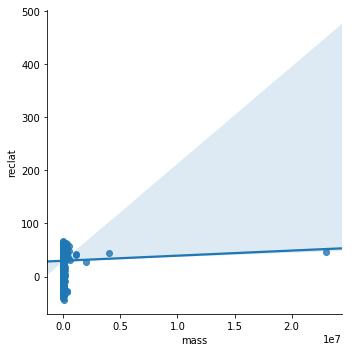

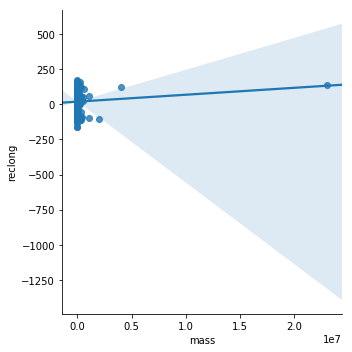

In [486]:
sns.lmplot(x="mass", y="reclat", data=table2)
sns.lmplot(x="mass", y="reclong", data=table2)

Because there is one large outlier, I'm going to drop it so I can better analyze the data

In [487]:
table2 = pd.read_json(json.dumps(data2.json()))
clean_table2 = table2.replace({'23000000.00': np.nan}).dropna()

In [488]:
clean_table2.describe()

,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,id,mass,reclat,reclong
count,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000
mean,26.901515,1538.507576,14759.659091,3.035584e+04,37.563847,-91.808212
std,12.747615,898.298226,11167.779451,1.106859e+05,4.514754,13.673124
min,1.000000,10.000000,2276.000000,1.390000e+01,21.300000,-157.866670
25%,17.000000,654.750000,5389.750000,6.635000e+02,35.033330,-97.629165
50%,23.500000,1647.000000,12236.500000,2.370500e+03,37.875000,-90.171545
75%,37.000000,2226.750000,18783.000000,1.109250e+04,40.542032,-83.691667
max,50.000000,3190.000000,56133.000000,1.100000e+06,47.816670,-68.750000


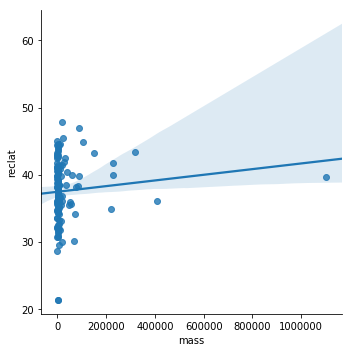

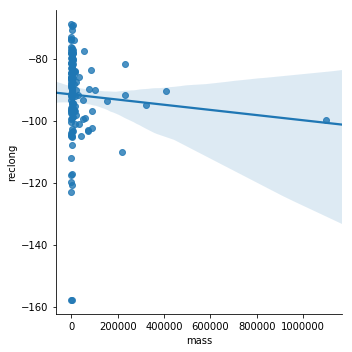

In [489]:
sns.lmplot(x="mass", y="reclat", data=clean_table2)
sns.lmplot(x="mass", y="reclong", data=clean_table2)

After removing the max outlier, it becomes more clear that the mass of the majority of these meteors is still close to zero, which wasn't as clear with the outlier

# **Data set #3**

Finally I will get data on one-family houses sold in the US, in thousands, from 1992-2010.

This will be a from .dta file

First I will download the .dta file, open it in Stata, copy it into excel and save it as a csv to load it into jupyter

In [490]:
data3 = pd.read_csv("homes.csv")
data3.head()

,homes,irate
0,676,8.43
1,639,8.76
2,554,8.94
3,546,8.85
4,554,8.67


Since the data is already clean, I will go ahead and visualize it in a graph showing the relationship between home value and interest rates

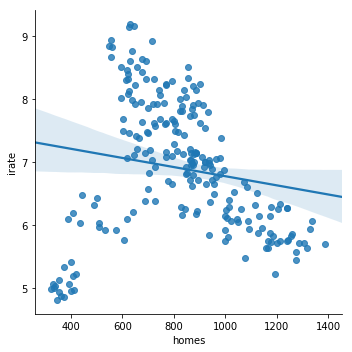

In [491]:
sns.lmplot(x="homes", y="irate", data=data3)